<a href="https://colab.research.google.com/github/acorbett02/320GITdiscussion2/blob/main/HW2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Homework 2. Orientation and SE(3)
In this homework, we will investigate
- How to define, use, and visualize orientation matrices, SO(3)
- How to define, use, and visualize the coordinate transformation, SE(3)

$\color{red}{\text{Please do not use any other Python packages except the ones we give you.}}$


In [21]:
# python libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import animation
from IPython.display import HTML
from math import pi
import plotly.graph_objects as go
import mpl_toolkits.mplot3d.axes3d as p3
import scipy

# Q.1 [5 pts] Make a function that converts ZYX Euler angle representation to SO(3)
Complete the fuction returning the orientation matrix, SO(3), given the Euler ZYX angles.


*Convention:* Intrinsic ZYX rotations (rotate about $z$, then $y$, then $x$ of the current/local frame).

In [28]:
def ZYX_to_SO3(th_z, th_y, th_x):
  # Put your code here
  z_rot = np.array([[np.cos(th_z), -np.sin(th_z), 0],
                    [np.sin(th_z), np.cos(th_z), 0],
                    [0, 0, 1]])
  y_rot = np.array([[np.cos(th_y), 0, np.sin(th_y)],
                    [0, 1, 0],
                    [-np.sin(th_y), 0, np.cos(th_y)]])
  x_rot = np.array([[1, 0, 0],
                    [0, np.cos(th_x), -np.sin(th_x)],
                    [0, np.sin(th_x), np.cos(th_x)]])
  SO3 = z_rot @ y_rot @ x_rot
  return SO3

Test function for ZYX_to_SO3. Use this code for debugging

In [29]:
def test_ZYX_to_SO3():
  zyx_test = np.array([[0.3, 0.2, 0.7],
                       [0.7, np.pi, np.pi/2],
                       [np.pi/3, 0, 0]])
  soln = np.array([[[ 0.93629336, -0.10375634,  0.33554338],
                    [ 0.28962948,  0.76850419, -0.57054017],
                    [-0.19866933,  0.63137622,  0.74959627]],
                   [[-7.64842187e-01,  5.42191972e-17,  6.44217687e-01],
                    [-6.44217687e-01,  1.25726990e-16, -7.64842187e-01],
                    [-1.22464680e-16, -1.00000000e+00, -6.12323400e-17]],
                   [[ 0.5      , -0.8660254,  0.       ],
                    [ 0.8660254,  0.5      ,  0.       ],
                    [ 0.       ,  0.       ,  1.       ]]])
  res = []
  for test in zyx_test:
    res.append(ZYX_to_SO3(*test))
  res = np.array(res)
  if np.allclose(res, soln):
    print('your implementation is correct')
  else:
    print('In correct implementation try again')



In [30]:
test_ZYX_to_SO3()

your implementation is correct


# Q.2 [5 pts] Visualize the following frame orientations.
\begin{align}
        (a) ZYX &= (0.3, 0.2, 0.7)\ [rad]\\
        (b) ZYX &= (0.7, 0, \pi/2)\ [rad]\\
        (c) ZYX &= (π/3, 0, 0)\ [rad]
\end{align}

In this problem, you will use the function implemented above to draw the frames with the given Euler angle (a), (b), and (c).




In [31]:
# Help function. No need to change
def draw_vector(ax, origin, end, **kwargs):
  ax.quiver(*origin, *(end-origin), **kwargs)

def draw_axes(ax=None, R=np.eye(3), offset = [0,0,0], draw_global_frame=True, **kwargs):
  """
  R: rotation matrix 3x3
  offset: origin offset 3x1
  """
  offset = np.array(offset)

  x0 = np.zeros(3)
  y0 = np.zeros(3)
  z0 = np.zeros(3)

  x0 += offset
  y0 += offset
  z0 += offset

  x0[0] += 1
  y0[1] += 1
  z0[2] += 1

  x_e = R[:, 0] + offset #x-axis arrow head
  y_e = R[:, 1] + offset
  z_e = R[:, 2] + offset

  if ax is None:
    print("none")
    fig= plt.figure(figsize=(10,10))
    ax = p3.Axes3D(fig)

  if draw_global_frame:
    draw_vector(ax, offset, x0, lw=8, color = 'r', label='x0 global', alpha=0.2)
    draw_vector(ax, offset, y0, lw=8, color = 'g', label='y0 global', alpha=0.2)
    draw_vector(ax, offset, z0, lw=8, color = 'b', label='z0 global', alpha=0.2)

  draw_vector(ax, offset, x_e, lw=8, color = 'r', label='x local')
  draw_vector(ax, offset, y_e, lw=8, color = 'g', label='y local')
  draw_vector(ax, offset, z_e, lw=8, color = 'b', label='z local')

  ax.set_xlim([-2, 2])
  ax.set_ylim([-2, 2])
  ax.set_zlim([-2, 2])

  return ax

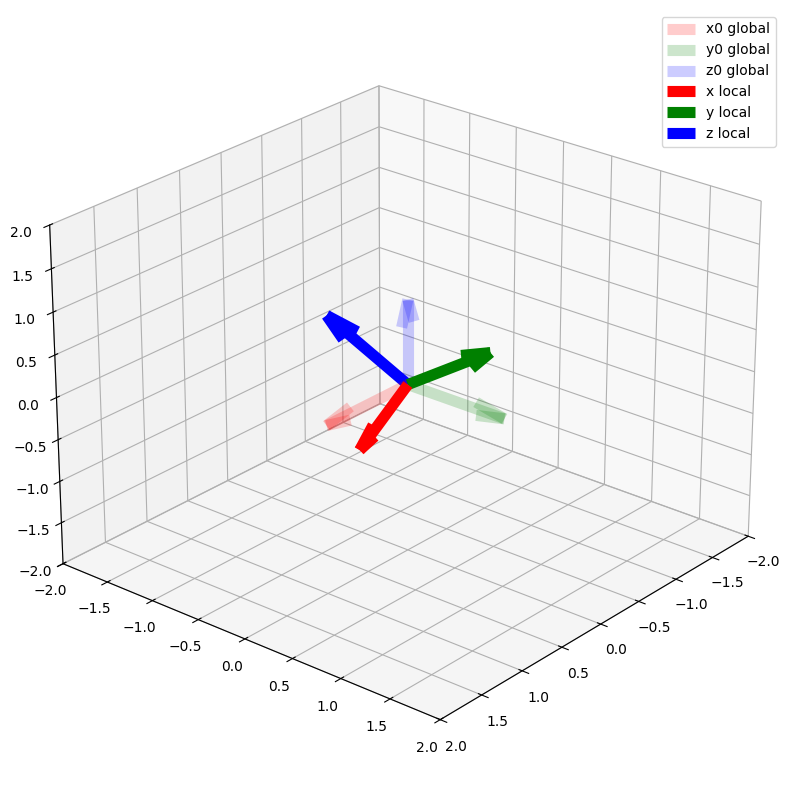

In [32]:
fig_a= plt.figure(figsize=(10,10))
ax_a = fig_a.add_subplot(projection='3d')

#(a) Put your code: Visualize the frame {a} resulted by (0.3,0.2,0.7) [𝑟𝑎𝑑] ZYX rotation
draw_axes(ax_a, R=ZYX_to_SO3(0.3, 0.2, 0.7))
# ----------------------------
ax_a.legend()
ax_a.view_init(25, 40)
fig_a.show()

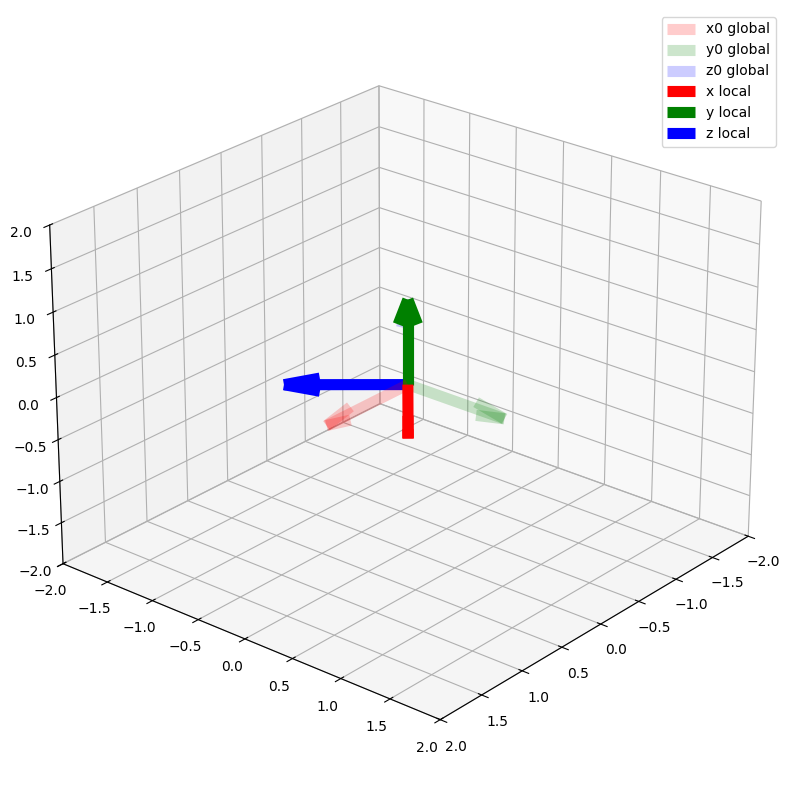

In [33]:

fig_b= plt.figure(figsize=(10,10))
ax_b = fig_b.add_subplot(projection='3d')

#(b) Put your code here: Visualize the frame {b} resulted by (0.7,0,𝜋/2) [𝑟𝑎𝑑] ZYX rotation
draw_axes(ax_b, R=ZYX_to_SO3(0.7, 0, np.pi/2))
# ----------------------------
ax_b.view_init(25, 40)
ax_b.legend()

fig_b.show()

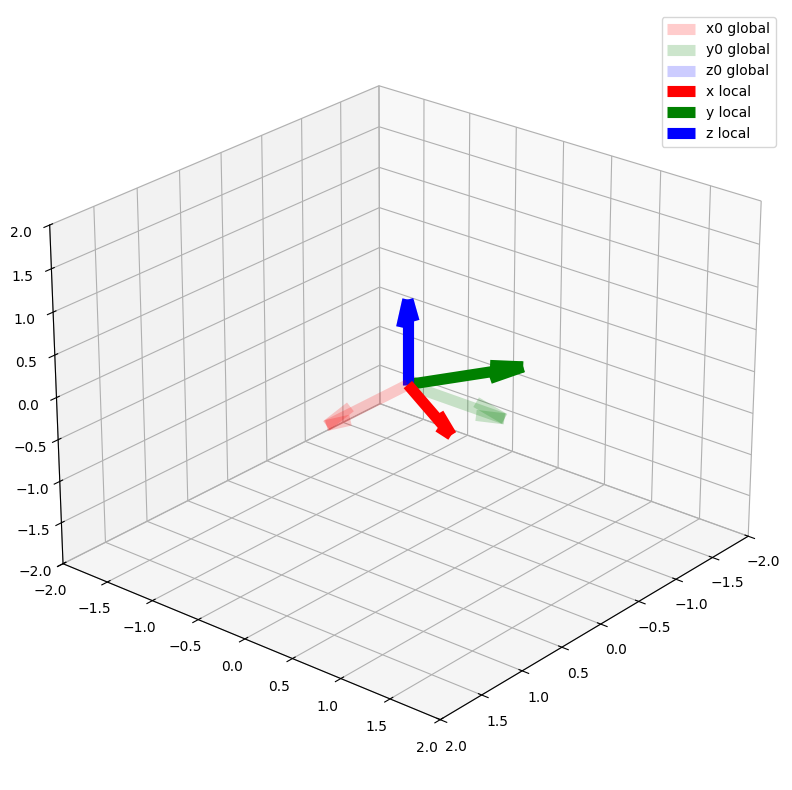

In [34]:

fig_c= plt.figure(figsize=(10,10))
ax_c = fig_c.add_subplot(projection='3d')

#(c) Write your code here: Similarly, Visualize the frame {c}
draw_axes(ax_c, R=ZYX_to_SO3(np.pi/3, 0, 0))
# ----------------------------------------------

ax_c.legend()
ax_c.view_init(25, 40)
fig_c.show()

# Q.3 [20 pts] Make a function that converts ZYX Euler angle representation to Quaternion representation

Complete the implementation of the function, ZYX_to_Quaternion, which takes euler angles as inputs and returns quaternion coincide with the euler angles.

In [43]:
def ZYX_to_Quaternion(th_z, th_y, th_x):
  quaternion = np.zeros(4)
  # Write your code here
  q_z = np.array([np.cos(th_z/2), 0, 0, np.sin(th_z/2)])
  q_y = np.array([np.cos(th_y/2), 0, np.sin(th_y/2), 0])
  q_x = np.array([np.cos(th_x/2), np.sin(th_x/2), 0, 0])
  # split up components for multiplication
  a1 = q_z[0]
  b1 = q_z[1]
  c1 = q_z[2]
  d1 = q_z[3]
  a2 = q_y[0]
  b2 = q_y[1]
  c2 = q_y[2]
  d2 = q_y[3]

  # Hamilton Z * Y
  q0 = a1*a2 - b1*b2 - c1*c2 - d1*d2
  qi = a1*b2 + b1*a2 + c1*d2 - d1*c2
  qj = a1*c2 - b1*d2 + c1*a2 + d1*b2
  qk = a1*d2 + b1*c2 - c1*b2 + d1*a2

  # Round 2: (Z * Y) * X
  a1 = q0
  b1 = qi
  c1 = qj
  d1 = qk

  a2 = q_x[0]
  b2 = q_x[1]
  c2 = q_x[2]
  d2 = q_x[3]

  q0 = a1*a2 - b1*b2 - c1*c2 - d1*d2
  qi = a1*b2 + b1*a2 + c1*d2 - d1*c2
  qj = a1*c2 - b1*d2 + c1*a2 + d1*b2
  qk = a1*d2 + b1*c2 - c1*b2 + d1*a2

  quaternion = np.array([q0, qi, qj, qk])

  # ---------------------------------------------
  return quaternion

def vee(R):
  return np.array([R[2,1], R[0, 2], R[1, 0]])

def SO3_to_so3(R):
  omega, theta = None, 0
  if np.allclose(R, np.eye(3)): # if R = identity
    pass
  elif np.abs(np.trace(R)+1)<1e-5: # if theta = pi
    theta = np.pi
    r13 = R[0,2]
    r23 = R[1,2]
    r33 = R[2,2]
    omega = np.array([r13,r23, 1+r33])
    omega *= (1./np.sqrt(2*(1+r33)))
  else: # Other normal cases
    # write your code to compute so(3)
    ...
    # ----------------------------------------
  return omega, theta

In [44]:
def test_ZYX_to_Quaternion():
  zyx_test = np.array([[0.3, 0.2, 0.7],
                       [0.7, np.pi, np.pi/2],
                       [np.pi/3, 0, 0]])
  # print(zyx_test)
  soln = np.array([[ 0.92929998,  0.32333918,  0.14371374,  0.10582853],
                  [ 0.24246536, -0.24246536,  0.66423682, -0.66423682],
                  [ 0.8660254,   0.,          0.,          0.5       ]])
  res = []
  for test in zyx_test:
    res.append(ZYX_to_Quaternion(*test))
  res = np.array(res)
  if np.allclose(res, soln):
    print('your implementation is correct')
  else:
    print(res, soln)
    print('In correct implementation try again')

In [49]:
test_ZYX_to_Quaternion()

your implementation is correct


# Q.4 [15 pts] Rotate the vector
\begin{align}  p=(1, 0.4, 0.7)\\ \end{align}
about the $z$-, $y$-, and $x$-axes by the given angles *in that order* (ZYX; angles in radians):

\begin{align}
\text{(a)}\;\; \text{ZYX} &= (0.5,\; 0.3,\; -0.7)\;[\text{rad}]\\
\text{(b)}\;\; \text{ZYX} &= (0.7,\; 0.1,\; \pi/3)\;[\text{rad}]\\
\text{(c)}\;\; \text{ZYX} &= (\pi/2,\; 0,\; 0)\;[\text{rad}]
\end{align}

Visualize each case and report the coordinates of the rotated vector in the global (world) frame.

In [47]:
p = np.array([1, 0.4, 0.7])

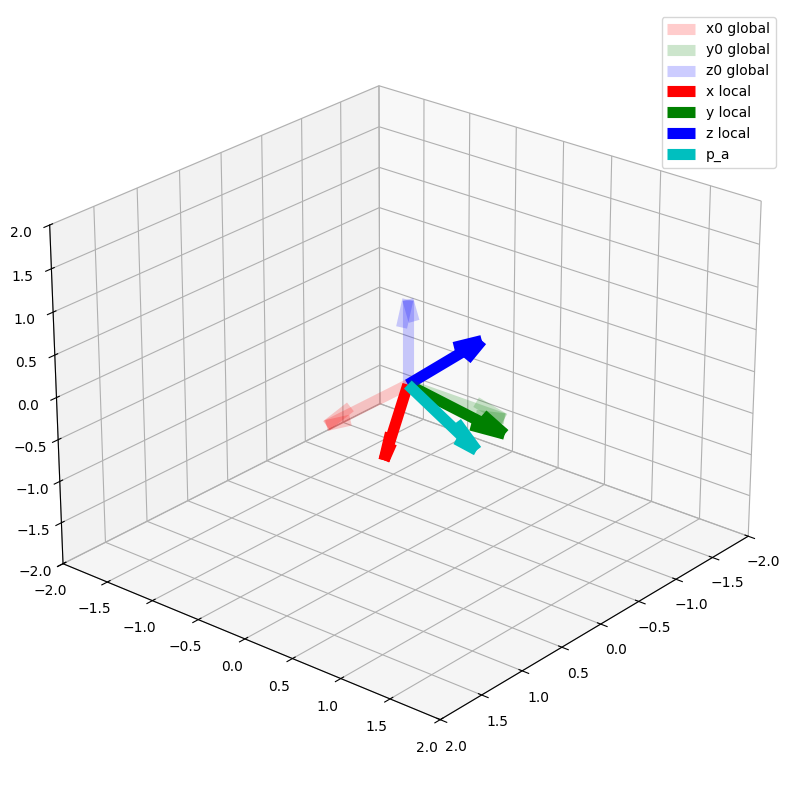

In [51]:
fig_q4 = plt.figure(figsize=(10,10))

# Write your code: Compute the vector (p_a) rotated by R_4a
R_4a = ZYX_to_SO3(0.5, 0.3, -0.7)
p_a = R_4a @ p
# -------------------------------------------------

ax_q4 = fig_q4.add_subplot(projection='3d')
ax_q4 = draw_axes(ax=ax_q4, R=R_4a)
draw_vector(ax_q4, [0, 0, 0], p_a, color='c', label='p_a', lw=8)
ax_q4.legend()
ax_q4.view_init(25, 40)

fig_q4.show()

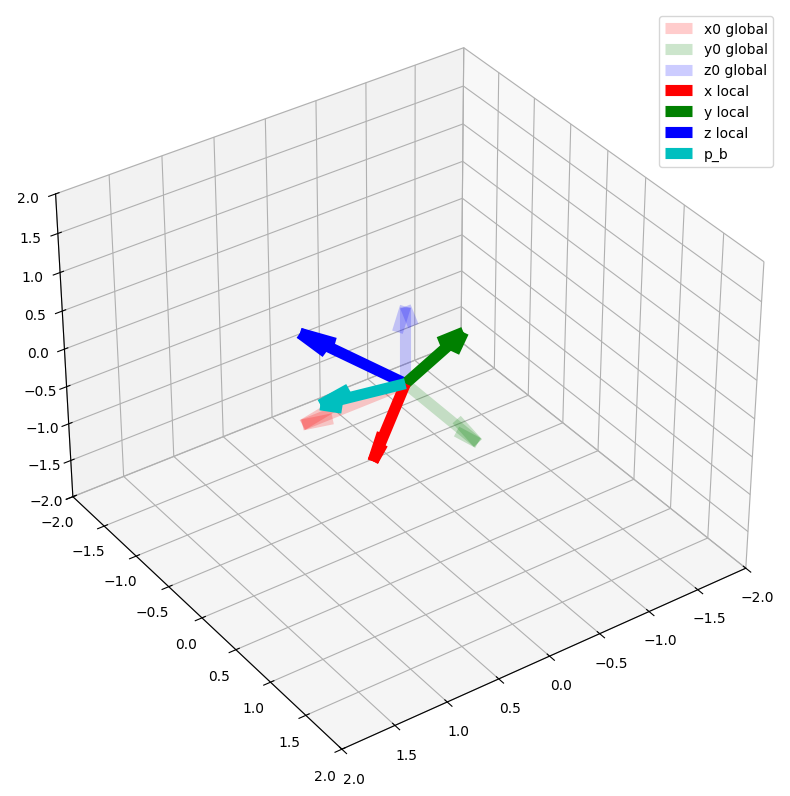

In [52]:
fig_q4b= plt.figure(figsize=(10,10))

# Write your code: Compute the vector (p_b) rotated by R_4b
R_4b = ZYX_to_SO3(0.7, 0.1, np.pi/3)
p_b = R_4b @ p
# -----------------------------------------------------------

ax_q4b= fig_q4b.add_subplot(projection='3d')
ax_q4b = draw_axes(ax=ax_q4b, R=R_4b)
draw_vector(ax_q4b, [0, 0, 0], p_b, color='c', label='p_b', lw=8)
ax_q4b.legend()
ax_q4b.view_init(35, 55)
fig_q4b.show()

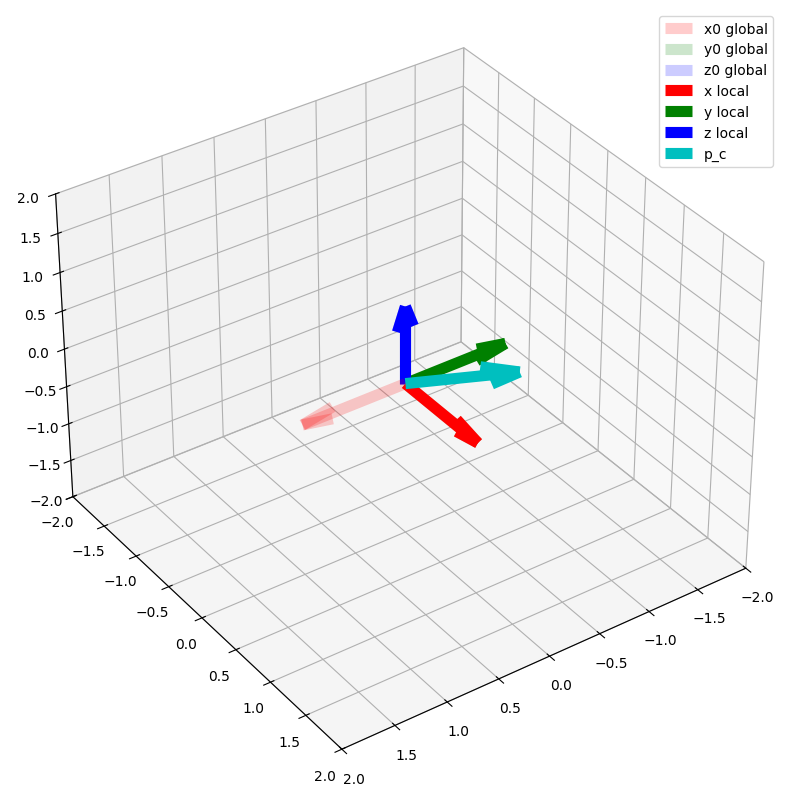

In [53]:
fig_q4c= plt.figure(figsize=(10,10))

# Write your code: Compute the vector (p_c) rotated by R_4c
R_4c = ZYX_to_SO3(np.pi/2, 0, 0)
p_c = R_4c @ p
# --------------------------------------------------
ax_q4c= fig_q4c.add_subplot(projection='3d')
ax_q4c = draw_axes(ax=ax_q4c, R=R_4c)
draw_vector(ax_q4c, [0, 0, 0], p_c, color='c', label='p_c', lw=8)
ax_q4c.legend()
ax_q4c.view_init(35, 55)

fig_c.show()

# Q.5 (a) [10 pts] Integrate constant anglar velocity of $ω=[2, 10, 0]\ [rad/s]$ during 0.45 sec starting from the following orientation:
\begin{equation}R = \begin{bmatrix}
      0 &1 &0 \\
      -1& 0& 0 \\
      0& 0 & 1
      \end{bmatrix}.
\end{equation}

Note: You need to find two different results depending on which frame is used to define anglur velocity.

In [58]:
# Help function: 3-dim vector to skew symmetry matrix. No need to change
def hat(a):
  return np.array([[0, -a[2], a[1]],
                   [a[2], 0, -a[0]],
                   [-a[1], a[0], 0]])

In [59]:
N_t = 30
delta_t = 0.015
R_implicit = np.zeros((N_t, 3, 3))
R_explicit = np.zeros((N_t, 3, 3))

# Write your code to compute R_implicit, R_explicit, which are resultant orientation matrices due to the given angluar velocity
omega_vec = np.array([2, 10, 0])
omega_hat = hat(omega_vec)
R0 = np.array([[0, 1, 0], [-1, 0, 0], [0, 0, 1]])

R_implicit[0] = R0
R_explicit[0] = R0

for i in range(1, N_t):
  R_implicit[i] = R_implicit[i-1] @ scipy.linalg.expm(omega_hat * delta_t)
  R_explicit[i] = scipy.linalg.expm(omega_hat * delta_t) @ R_explicit[i-1]

# Q.5 (b) [10 pts] Animate and explain the difference of explicit and implicit integration


In [61]:
# This is the function returning animation frame
# please complete the drawFrame function below
def draw_axes_mp(Rs, **kwargs):
  """
  Rs: a list of rotation matrices
  """
  fig= plt.figure(figsize=(10,10))
  ax = fig.add_subplot(projection='3d')
  origin = np.zeros(3)

  x0 = np.zeros(3)
  y0 = np.zeros(3)
  z0 = np.zeros(3)

  x0[0] += 1
  y0[1] += 1
  z0[2] += 1

  draw_vector(ax, origin, x0, lw=8, color = 'r', label='x0 global', alpha=0.2)
  draw_vector(ax, origin, y0, lw=8, color = 'g', label='y0 global', alpha=0.2)
  draw_vector(ax, origin, z0, lw=8, color = 'b', label='z0 global', alpha=0.2)

  x_axis,  = ax.plot([0, 1], [0, 0], [0, 0], lw=8, color='r', label='x')
  y_axis,  = ax.plot([0, 0], [0, 1], [0, 0], lw=8, color='g', label='y')
  z_axis,  = ax.plot([0, 0], [0, 0], [0, 1], lw=8, color='b', label='z')

  ax.set_xlim([-2, 2])
  ax.set_ylim([-2, 2])
  ax.set_zlim([-2, 2])
  ax.legend()
  ax.view_init(25, 40)


  def drawFrame(k):
    # complete this function that updates x-, y-, and z- axes with the values in Rs
    R = Rs[k]
    x = R[:, 0]
    y = R[:, 1]
    z = R[:, 2]

    x_axis.set_data([0, x[0]], [0, x[1]])
    x_axis.set_3d_properties([0, x[2]])
    y_axis.set_data([0, y[0]], [0, y[1]])
    y_axis.set_3d_properties([0, y[2]])
    z_axis.set_data([0, z[0]], [0, z[1]])
    z_axis.set_3d_properties([0, z[2]])
    # -------------------------------------------------------------
    return x_axis, y_axis, z_axis,

  if 'frames' in kwargs:
    anim = animation.FuncAnimation(fig, drawFrame, frames=kwargs['frames'], interval=500, blit=True)
  else:
    anim = animation.FuncAnimation(fig, drawFrame, frames=10, interval=500, blit=True)
  return anim

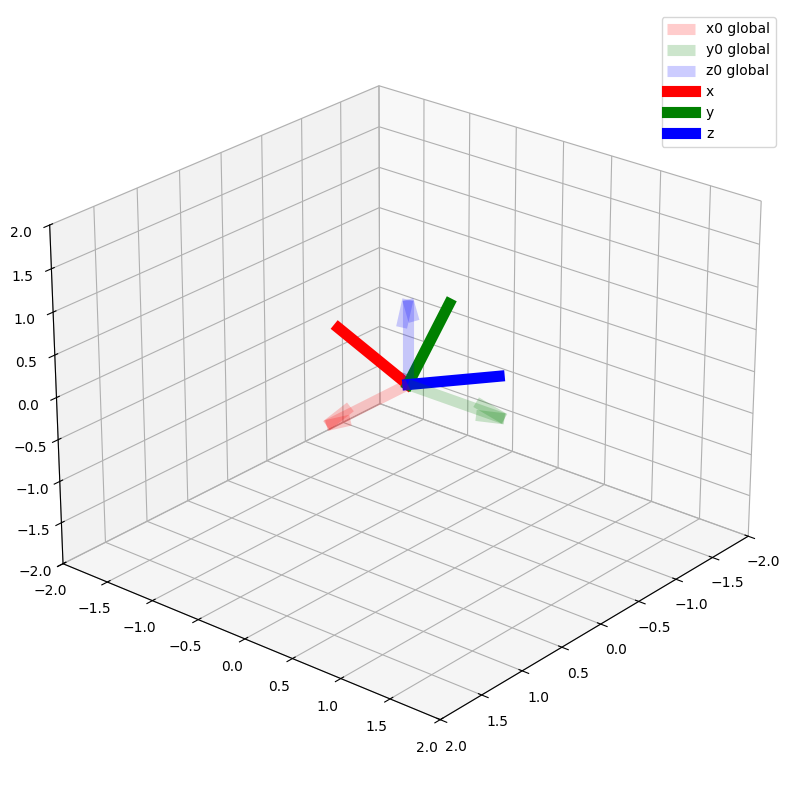

In [62]:
anim = draw_axes_mp(R_explicit, frames = N_t)
HTML(anim.to_html5_video())

**Animate implicit rotation**

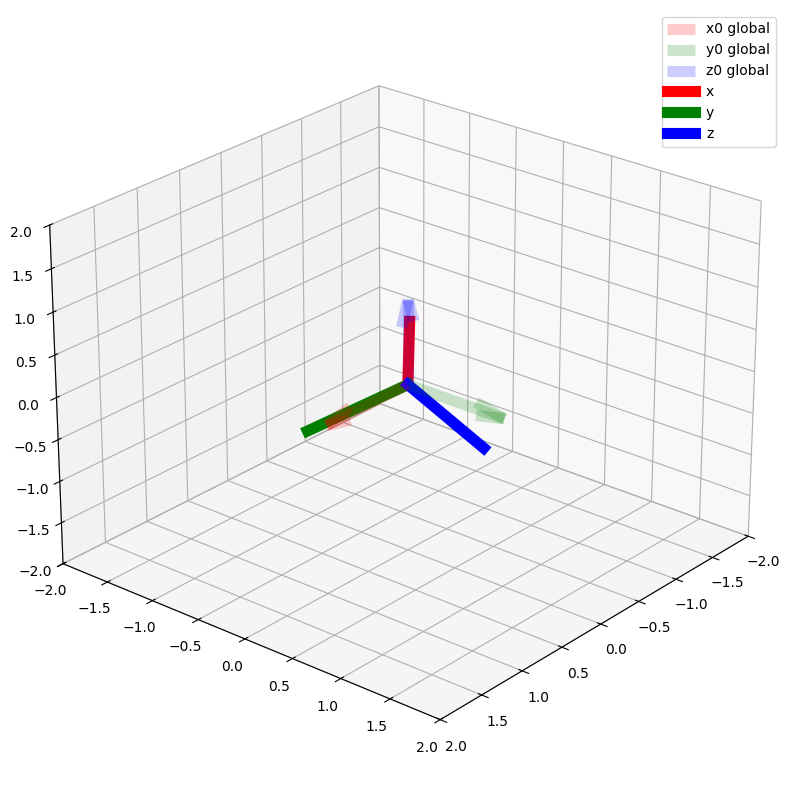

In [63]:
anim = draw_axes_mp(R_implicit, frames=N_t)
HTML(anim.to_html5_video())

**Explain the difference of implicit and explicit rotation based on the integration results**

Implicit rotation rotates based on the local axes. Explicit rotation rotates based on the global axes. The integration results demonstrate this because, in the case of the implicit rotation, we can see the rotating axes hold their relative positioning to one another as it appears almost like an object rotating with a constant angular velocity in space: it's movement is independent of what is around it and completely dependent on itself. However, in the case of the explicit, we can see the axes pick up speed and slow down depending on how their orientation has changed compared to the global axes: it does not appear like a rotating object, but three independent rotating axes.

#Q.6 [5 pts] Make a function that converts position and ZYX orientation representation to SE(3).

In [64]:
def POS_ZYX_to_SE3(x, y, z, th_z, th_y, th_x):
  SE3  = np.eye(4)
  # Write your code
  # R p
  # 0 1
  R = ZYX_to_SO3(th_z, th_y, th_x)
  SE3[:3, :3] = R
  SE3[:3, 3] = np.array([x, y, z])
  SE3[3, 3] = 1
  # SE 3, :3 is default 0s
  return SE3

In [65]:
def test_POS_ZYX_to_SE3():
  zyx_test = np.array([[0.3, 0.2, 0.7, 0.5, 0.2, 1.2],
                       [0.5, 0.6, 1.8, 0.7, np.pi, np.pi/2],
                       [0.1, 0.0, 2, np.pi/3, 0, 0]])
  soln = np.array([[[ 8.60089338e-01, -1.12237211e-02,  5.10019959e-01,  3.00000000e-01],
                    [ 4.69868947e-01,  4.06772914e-01, -7.83427705e-01,  2.00000000e-01],
                    [-1.98669331e-01,  9.13460357e-01,  3.55134724e-01,  7.00000000e-01],
                    [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  1.00000000e+00]],
                  [[-7.64842187e-01,  5.42191972e-17,  6.44217687e-01,  5.00000000e-01],
                    [-6.44217687e-01,  1.25726990e-16, -7.64842187e-01,  6.00000000e-01],
                    [-1.22464680e-16, -1.00000000e+00, -6.12323400e-17,  1.80000000e+00],
                    [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  1.00000000e+00]],
                  [[ 5.00000000e-01, -8.66025404e-01,  0.00000000e+00,  1.00000000e-01],
                    [ 8.66025404e-01,  5.00000000e-01,  0.00000000e+00,  0.00000000e+00],
                    [ 0.00000000e+00,  0.00000000e+00,  1.00000000e+00,  2.00000000e+00],
                    [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  1.00000000e+00]]])
  res = []
  for test in zyx_test:
    res.append(POS_ZYX_to_SE3(*test))
  res = np.array(res)
  if np.allclose(res, soln):
    print('your implementation is correct')
  else:
    print('In correct implementation try again')

In [66]:
test_POS_ZYX_to_SE3()

your implementation is correct


#Q.7 [20 pts] Using the following relationships between frames, find the SE(3) representing $frame{\{0\}}→{\{i\}} \ ∀\  i \in \{0, 1, 2, 3\}$ and draw them in one plot.

> > * frame${\{0\}}: position=(0, 0, 0),\  ZYX=(0, 0, 0) $
> > * frame${\{0\}}→{\{1\}}: position=(0.4, 0.0, 0.4),\  ZYX=(0, \theta_1, 0) $
> > * frame${\{1\}}→{\{2\}}: position=(0.7, 0.0, 0.8),\  ZYX=(0, \theta_2, 0) $
> > * frame${\{2\}}→{\{3\}}: position=(1.0, 0.0, 0.4),\  ZYX=(0, \theta_3, 0) $

In [74]:
# Help function. No need to change
def draw_SE3(ax, T):
  ax = draw_axes(ax, R=T[:3, :3], offset = T[:-1, 3], draw_global_frame=False)
  return ax

Plot all four frames when $\theta_1=\theta_2=\theta_3=0$

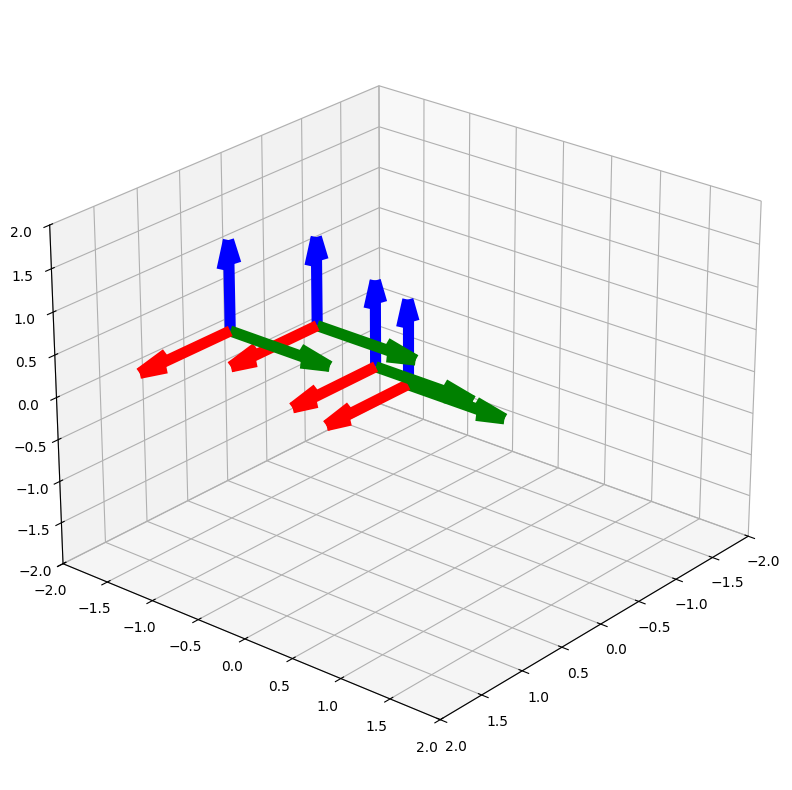

In [78]:
T0 = POS_ZYX_to_SE3(0.0, 0.0, 0.0, 0., 0.0, 0.0)

# Write your code: Complete all SE(3)
T0_1 = POS_ZYX_to_SE3(0.4, 0.0, 0.4, 0., 0.0, 0.)
T1_2 = POS_ZYX_to_SE3(0.7, 0.0, 0.8, 0., 0.0, 0.)
T2_3 = POS_ZYX_to_SE3(1.0, 0.0, 0.4, 0., 0.0, 0.)

T0_2 = T0 @ T0_1 @ T1_2
T0_3 = T0_2 @ T2_3

# ------------------------------------------------------
fig_T1= plt.figure(figsize=(10,10))
ax = fig_T1.add_subplot(projection='3d')
ax.view_init(25, 40)

ax = draw_SE3(ax, T0)
ax = draw_SE3(ax, T0_1)
ax = draw_SE3(ax, T0_2)
ax = draw_SE3(ax, T0_3)

# Q.8 [10 pts] In this question, the pitch angles of frames defined in Q.7 change over time like below:
\begin{align}
\theta_1(t) &= sin(ωt)\\
\theta_2(t) &= sin(ωt + 0.3)\\
\theta_3(t) &= 0.
\end{align}
Please complete the animation of frame movements when $ω = 5\ [rad/s]$ during $t \in [0, 1.5]$ sec.

In [83]:
N = 50
omega = 5
t = np.linspace(0, 1.5, N)
T_hist = np.zeros((N, 4, 4, 4))

# complete the code that saves history of the four frame change (T_hist)
for i in range(N):
  theta_1 = np.sin(omega * t[i])
  theta_2 = np.sin(omega * t[i] + 0.3)
  theta_3 = 0.

  T0 = POS_ZYX_to_SE3(0.0, 0.0, 0.0, 0., 0.0, 0.0)

  # Write your code: Complete all SE(3)
  T0_1 = POS_ZYX_to_SE3(0.4, 0.0, 0.4, 0., theta_1, 0.)
  T1_2 = POS_ZYX_to_SE3(0.7, 0.0, 0.8, 0., theta_2, 0.)
  T2_3 = POS_ZYX_to_SE3(1.0, 0.0, 0.4, 0., theta_3, 0.)

  T0_2 = T0 @ T0_1 @ T1_2
  T0_3 = T0_2 @ T2_3

  T_hist[i, 0, :, :] = T0
  T_hist[i, 1, :, :] = T0_1
  T_hist[i, 2, :, :] = T0_2
  T_hist[i, 3, :, :] = T0_3

In [84]:
# Help function. No need to change
def animate_frames(T_hist, **kwargs):
  """
  T_hist: a list of SE(3) matrices (N, n_frames, 4, 4)
  """
  fig= plt.figure(figsize=(10,10))
  ax = fig.add_subplot(projection='3d')

  N, n_frames, _, _ = T_hist.shape
  x_axis_list = []
  y_axis_list = []
  z_axis_list = []

  for i in range(n_frames):
    x_axis,  = ax.plot([0, 1], [0, 0], [0, 0], lw=8, color='r')
    y_axis,  = ax.plot([0, 0], [0, 1], [0, 0], lw=8, color='g')
    z_axis,  = ax.plot([0, 0], [0, 0], [0, 1], lw=8, color='b')
    x_axis_list.append(x_axis)
    y_axis_list.append(y_axis)
    z_axis_list.append(z_axis)

  ax.set_xlim([-2, 2])
  ax.set_ylim([-2, 2])
  ax.set_zlim([-2, 2])
  ax.legend()
  ax.view_init(25, 40)


  def drawFrame(k):
    for i in range(n_frames):
      T = T_hist[k, i, :, :]
      R=T[:3, :3]
      offset = T[:-1, 3]
      x_e = R[:, 0] + offset
      y_e = R[:, 1] + offset
      z_e = R[:, 2] + offset

      x_axis_list[i].set_data([offset[0], x_e[0]], [offset[1], x_e[1]])
      x_axis_list[i].set_3d_properties([offset[2], x_e[2]])
      y_axis_list[i].set_data([offset[0], y_e[0]], [offset[1], y_e[1]])
      y_axis_list[i].set_3d_properties([offset[2], y_e[2]])
      z_axis_list[i].set_data([offset[0], z_e[0]], [offset[1], z_e[1]])
      z_axis_list[i].set_3d_properties([offset[2], z_e[2]])
    return x_axis_list + y_axis_list + z_axis_list

  if 'frames' in kwargs:
    anim = animation.FuncAnimation(fig, drawFrame, frames=kwargs['frames'], interval=500, blit=True)
  else:
    anim = animation.FuncAnimation(fig, drawFrame, frames=10, interval=500, blit=True)
  return anim


/tmp/ipython-input-984225952.py:25: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


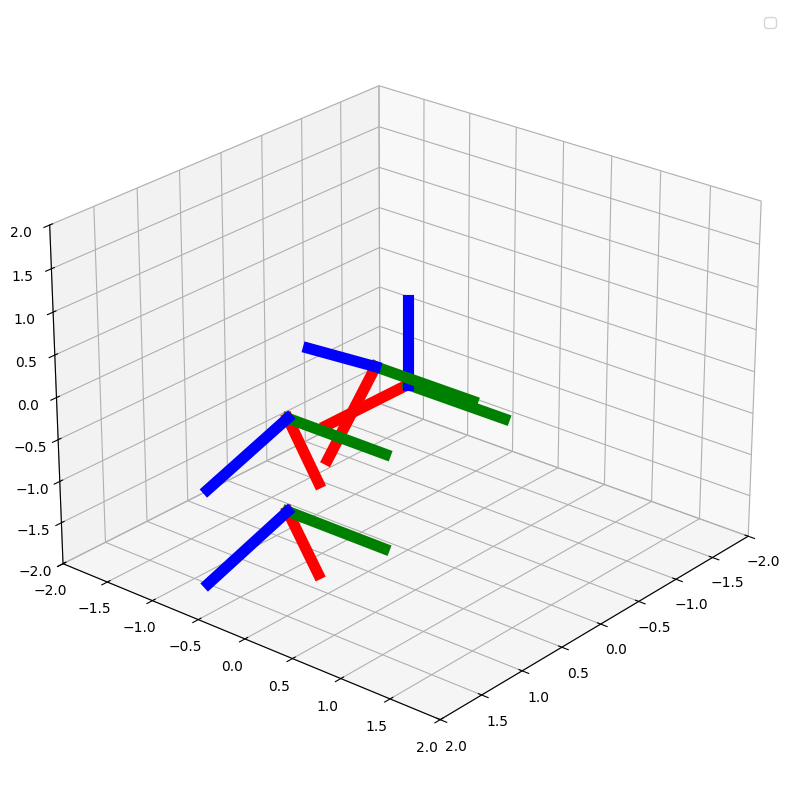

In [85]:
anim = animate_frames(T_hist, frames=N)
HTML(anim.to_html5_video())